Continuous-time model
---

Let's order the infection times $t_{\pi_{1}}<t_{\pi_{2}}<\dots<t_{\pi_{N}}$
. Let $\lambda_{i}\left(t\right)$ be a time-dependent transmission
rate and $L_{i}\left(t\right)=\int_{0}^{t}\lambda_{ij}\left(s\right)ds$
its primitive. Then $\rho_{i}\left(t_i; t_j\right)=\lambda_{i}\left(t_i\right)e^{-\int_{t_j}^{t_i}\lambda_{i}\left(s\right)ds} = \lambda_{i}\left(t_j\right)e^{L_{i}(t_j) - L_{i}(t_i) }$
will be the transmission ``delay'' density distribution. 

\begin{align*}p\left(t_{1},\dots,t_{N}\right) & =\prod_{i=1}^{N}\lim_{ds\to0^{+}}\frac{\prod_{j\in\partial i:t_{j}<t_{i}}e^{L_{i}(t_{j})-L_{i}(t_{i}-ds)}-\prod_{j\in\partial i:t_{j}<t_{i}}e^{L_{i}(t_{j})-L_{i}(t_{i})}}{ds}\\
 & =\prod_{i=1}^{N}\frac{d}{ds}_{|s=0}\prod_{j\in\partial i:t_{j}<t_{i}}e^{L_{i}(t_{j})-L_{i}(t_{i}-ds)}\\
 & =\prod_{i=1}^{N}\left\{ \left(\prod_{j\in\partial i:t_{j}<t_{i}}e^{L_{i}(t_{j})-L_{i}(t_{i})}\right)\sum_{j\in\partial i:t_{j}<t_{i}}\lambda_{i}\left(t_{i}\right)\right\} \\
\mathcal{L}_{0}\left(t_{1},\dots,t_{N}\right) & =\log p\left(t_{1},\dots,t_{N}\right)\\
 & =-\sum_{i=1}^{N}\left\{ \sum_{j\in\partial i:t_{j}<t_{i}}\left(L_{i}(t_{i})-L_{i}(t_{j})\right)-\log\left(\sum_{j\in\partial i:t_{j}<t_{i}}\lambda_{i}\left(t_{i}\right)\right)\right\} 
\end{align*}

Note that $$\int_{t_j}^{t_i} \rho_{i}(s; t_j) ds = 1-e^{-\left(L_{i}(t_i) - L_{i}(t_j)\right)}$$ so $$\lambda_{i}(t) = -\frac{d}{dt}\log \left(1-\int_{t_j}^{t_i} \rho_{i}(s) ds\right)$$


\begin{align}\lambda(t) & =ae^{-\left(\frac{t-b}{c}\right)^{2}}\\
\frac{x-b}{c} & =\frac{y}{\sqrt{2}}\\
dx & =\frac{c}{\sqrt{2}}dy\\
L(t)=\int_{0}^{t}ae^{-\left(\frac{x-b}{c}\right)^{2}}dx & = ac\int_{\frac{0-b}{c}}^{\frac{t-b}{c}}e^{-y^{2}}dy\\
 & =ac\sqrt{\pi}\frac{1}{\sqrt{\pi}}\int_{-\frac{b}{c}}^{\frac{t-b}{c}}e^{-y^{2}}dy\\
 & =\frac{ac\sqrt{\pi}}{2}\left(\mathrm{erfc}\left(-\frac{t-b}{c}\right)-\mathrm{erfc}\left(\frac{b}{c}\right)\right)\\
\rho_{i}\left(t_{i};t_{j}\right) & =\lambda_{i}\left(t_{i}\right)e^{-\int_{t_{j}}^{t_{i}}\lambda_{i}\left(s\right)ds}=\lambda_{i}\left(t_{i}\right)e^{L_{i}(t_{j})-L_{i}(t_{i})}\\
\frac{d}{ds}-e^{L_{i}(t_{j})-L_{i}(s)} & =\lambda\left(s\right)e^{L_{i}(t_{j})-L_{i}(s)}=\rho_{i}\left(s;t_{j}\right)\\
\end{align}

Sampling 
---
\begin{align}
\int_{t_{j}}^{t}\rho(s;t_{j})ds & =1-e^{L_{i}(t_{j})-L_{i}(t)}=1-r\sim U(0,1)\\
e^{L_{i}(t_{j})-L_{i}(t)} & =r\\
L_{i}(t) & =L_{i}\left(t_{j}\right)-\log(r)\\
\mathrm{erfc}\left(-\frac{t-b}{c}\right) & =\frac{2}{ac\sqrt{\pi}}\left(L_{i}\left(t_{j}\right)-\log(r)\right)+\mathrm{erfc}\left(\frac{b}{c}\right)\\
t & =-c\,\mathrm{ierfc}\left(\frac{2}{ac\sqrt{\pi}}\left(L_{i}\left(t_{j}\right)-\log(r)\right)+\mathrm{erfc}\left(\frac{b}{c}\right)\right)+b
\end{align}

In [50]:
using Causality

In [53]:
using SparseArrays, LinearAlgebra
T, N = 20.0, 30
ρ = 3/N
Λ = sprand(N, N, ρ, n->fill(true, n)) |> x->tril(x,-1) |> x->x+x'

30×30 SparseMatrixCSC{Int64, Int64} with 70 stored entries:
⢀⠐⠀⠄⠐⠀⠈⠈⠐⠀⢀⠠⠀⠀⠀
⠀⠄⠀⠀⠈⡀⠀⠁⠄⠀⢌⠀⠀⠄⠈
⠐⠀⠂⠠⠠⠂⠀⠀⠠⠀⠀⠀⠁⡀⡀
⡂⠀⠄⠀⠀⠀⠀⠀⠊⠀⠨⢀⠈⠀⠄
⠐⠀⠀⠁⠀⠂⠊⠀⠀⠀⠁⠂⠠⠀⠀
⠀⡐⠂⠑⠀⠀⠂⢂⠡⠀⠀⡠⠈⠀⠁
⠀⠀⠀⠄⠁⠠⠂⠀⠀⠂⠂⠀⠀⠀⠀
⠀⠀⠂⠀⠀⠈⠀⠁⠀⠀⠁⠀⠀⠀⠀

In [88]:

getpar(p,a1,b1,c1,a2,b2,c2) = [fill(p, 1, N);
     fill(a1, 1, N); fill(b1, 1, N); fill(c1, 1, N);
     fill(a2,   1, N); fill(b2, 1, N); fill(c2, 1, N)]

getpar (generic function with 1 method)

In [90]:
ε = 1e-10
λ = 0.1
θp = getpar(1/N, ε, T/2, 1/ε,   λ, T/2, 1/ε)
Mp = StochasticModel(T, θp, Λ, GaussianRate, GaussianRate);


sample! = Sampler(Mp)
xtrue = zeros(N)
sample!(xtrue)
sum(xtrue .< T)

19

In [91]:
ε = 1e-3
θp2 = getpar(1/N, ε, T/2, 1/ε,   λ, T/2, 1/ε)
Mp2 = StochasticModel(T, θp2, Λ, GaussianRate, GaussianRate);

In [92]:
θ = copy(θp2)
θmin = getpar(ε  , ε  ,  -T,   ε,   ε,  -T, ε  )
θmax = getpar(1-ε, 1/ε,  2T, 1/ε, 1/ε,  2T, 1/ε)
M = StochasticModel(T, θ, Λ, GaussianRate, GaussianRate);

In [93]:
nobs, p = 5, 1e-5
O = [(ti = T*(1+rand())/2; (i,xtrue[i] < ti,ti,p)) for i=1:nobs]

5-element Vector{Tuple{Int64, Bool, Float64, Float64}}:
 (1, 0, 19.623514397259978, 1.0e-5)
 (2, 1, 19.27794437639221, 1.0e-5)
 (3, 0, 15.089263044390728, 1.0e-5)
 (4, 1, 17.18246469680837, 1.0e-5)
 (5, 1, 17.490725764981285, 1.0e-5)

In [95]:
descend!(Mp2, O; M=M, numsamples=200, numiters=1000, 
         θmin=θmin, θmax=θmax, descender=SignDescender(1e-2));

┌ Warning: ProgressMeter by default refresh meters with additional information in IJulia via `IJulia.clear_output`, which clears all outputs in the cell. 
│  - To prevent this behaviour, do `ProgressMeter.ijulia_behavior(:append)`. 
│  - To disable this warning message, do `ProgressMeter.ijulia_behavior(:clear)`.
└ @ ProgressMeter /home/ab/.julia/packages/ProgressMeter/Vf8un/src/ProgressMeter.jl:620
Progress: 100%|█████████████████████████████████████████| Time: 0:00:12
  F:  4.249880090241323


In [96]:
function histo(v; bins=20, up=1.0)
    h = zeros(bins+1)
    z = length(v)
    for x in v
        h[floor(Int, x*bins/up)+1]+=1/z
    end
    h
end

histo (generic function with 1 method)

In [97]:
stats = post(Mp, O)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


30×10000 Matrix{Float64}:
 20.0      20.0      20.0      20.0      …  20.0      20.0      20.0
 18.2405    2.27059   2.41048   5.06015      9.16445   2.97738   0.975361
 17.7968   20.0      15.8949   20.0         20.0      20.0      20.0
  2.25312   0.0       9.12504   7.74407     10.5291    9.80753   0.773415
  9.44462  13.5077    6.35868  13.2393       3.58538   3.84997   2.21037
 20.0      20.0      20.0      20.0      …  20.0      20.0      20.0
  1.02501  14.1384   12.3002   20.0         12.5547   20.0      15.0582
  0.62246  16.6195   12.41      9.32456      6.21598   5.66459  15.8114
 20.0      20.0      20.0      20.0         20.0      20.0      20.0
 11.7081   17.44      2.42835   8.01388      1.88311   4.40929   8.89847
  5.4124   11.3886    8.57303  13.9349   …   0.0       0.0       8.62767
 20.0       4.60926  18.253    20.0         14.2665   20.0      20.0
  4.65423   9.44092   3.47831  10.6746      17.8527    1.56437   1.07039
  ⋮                                      ⋱   

In [98]:
causample! = Sampler(M)
statscau = prior(causample!)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


30×100000 Matrix{Float64}:
 20.0      20.0      20.0      20.0      …  20.0      20.0      20.0
  6.20598   8.12101   2.09681  17.6819       4.27296   6.8316    5.24605
 20.0      20.0      20.0      20.0         20.0      20.0      20.0
  5.9346    6.5136    2.45124   9.7861       0.0       3.63454  13.4546
  7.81063   0.0       2.84577   3.55342      1.35825   1.77868   2.1566
 20.0      20.0      20.0      20.0      …  20.0      20.0      20.0
 11.7572   20.0      20.0      20.0         20.0       2.2076   20.0
 20.0       0.0       4.8119   16.7351       7.72413   4.74379   9.57037
 20.0      20.0       0.0      20.0         20.0      20.0      20.0
  6.5153    5.96132   0.34747  15.5936       0.0       2.51496   5.20532
 20.0       4.88941   0.0      16.4898   …  20.0       8.46092  10.5211
  0.0      20.0      20.0       9.27522     20.0       8.41522  20.0
 13.6143   17.2913   17.8154    7.57992     10.4677    9.54656  15.6161
  ⋮                                      ⋱          

In [99]:
O

5-element Vector{Tuple{Int64, Bool, Float64, Float64}}:
 (1, 0, 19.623514397259978, 1.0e-5)
 (2, 1, 19.27794437639221, 1.0e-5)
 (3, 0, 15.089263044390728, 1.0e-5)
 (4, 1, 17.18246469680837, 1.0e-5)
 (5, 1, 17.490725764981285, 1.0e-5)

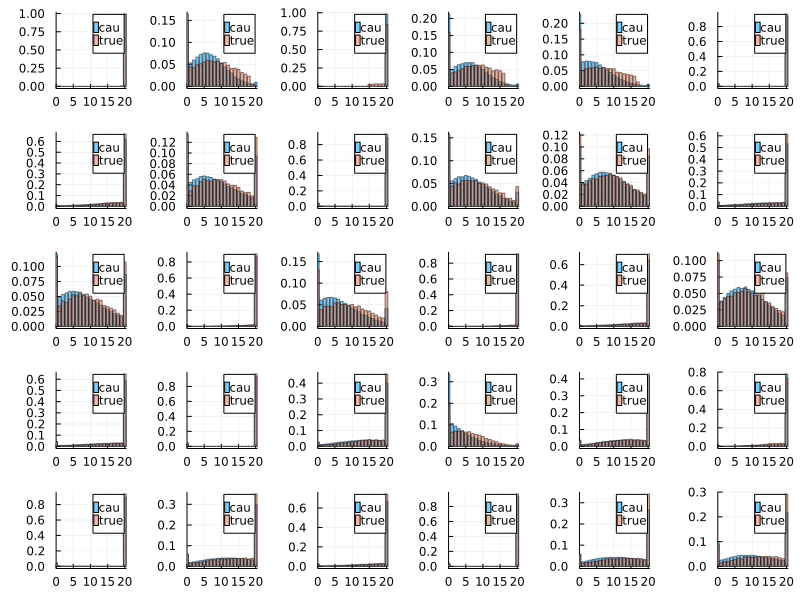

In [100]:
using Plots
pl = map(1:N) do k
    p = plot()
    bar!(p, 0:M.T/20:M.T, histo((@view statscau[k,:]), up=M.T), alpha=0.5, legend=true, xlims=(0,M.T+0.5), bins=20, label="cau");
    bar!(p, 0:M.T/20:M.T, histo((@view stats[k,:]), up=M.T),    alpha=0.5, legend=true, xlims=(0,M.T+0.5), bins=20, label="true");
end;
plot(pl..., size=(800,600))